🎯 Desafio dia 96 — Frequência Cardíaca de Pacientes

📂 Dataset: desafio_dia_96_frequencia_cardiaca.csv

🔍 Contexto: Um hospital está monitorando diariamente a frequência cardíaca de pacientes internados durante 3 meses. O objetivo é identificar padrões e mudanças significativas nos batimentos ao longo do tempo.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

    Preencha os valores ausentes em frequencia_cardiaca com a média do paciente (groupby('id_paciente')).

📊 Análise geral

    Qual paciente teve a maior média de frequência cardíaca durante o período?

    Qual a variação média (diferença entre dia atual e anterior) da frequência cardíaca para todos os pacientes?

📈 Visualização de dados

    Escolha um paciente aleatório e plote:

        A frequência cardíaca diária.

        Uma média móvel de 7 dias no mesmo gráfico.

        Um gráfico de dispersão da variação (diff()) da frequência ao longo do tempo.

🤖 Análise temporal com decomposição

    Utilize seasonal_decompose do statsmodels para decompor a série de um paciente:

        Mostre os componentes: tendência, sazonalidade e ruído.

        O objetivo é entender se há algum ciclo claro nos batimentos.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
df = pd.read_csv("novo_desafio_dia_96_frequencia_cardiaca.csv")

df["data"] = pd.to_datetime(df["data"])
df.head()

,data,id_paciente,frequencia_cardiaca
0,2024-01-01,5001,75.6
1,2024-01-02,5001,74.6
2,2024-01-03,5001,69.7
3,2024-01-04,5001,77.9
4,2024-01-05,5001,76.1


In [19]:
#Preencha os valores ausentes em frequencia_cardiaca com a média do paciente (groupby('id_paciente')).
df["frequencia_cardiaca"] = df["frequencia_cardiaca"].fillna(
    df.groupby("id_paciente")["frequencia_cardiaca"].transform("mean")
)
df["frequencia_cardiaca"].isna().sum()

np.int64(0)

In [8]:
#Qual paciente teve a maior média de frequência cardíaca durante o período?
paciente_frequencia_cardiaca = df.groupby("id_paciente")["frequencia_cardiaca"].mean()
print(paciente_frequencia_cardiaca.idxmax())

5008


In [9]:
#Qual a variação média (diferença entre dia atual e anterior) da frequência cardíaca para todos os pacientes?
ordenado = df.sort_values(["id_paciente", "data"])
ordenado["variacao"] = ordenado.groupby("id_paciente")["frequencia_cardiaca"].diff()
print(ordenado["variacao"].mean())

0.04122209165687425


In [30]:
#Escolha um paciente aleatório e plote:
#A frequência cardíaca diária.
#Uma média móvel de 7 dias no mesmo gráfico.
#Um gráfico de dispersão da variação (diff()) da frequência ao longo do tempo.
paciente_id = random.choice(df["id_paciente"].unique())
df_paciente = df[df["id_paciente"] == paciente_id].sort_values("data")
print(df_paciente)

           data  id_paciente  frequencia_cardiaca
4140 2024-01-01         5047                 68.5
4141 2024-01-02         5047                 92.5
4142 2024-01-03         5047                 74.5
4143 2024-01-04         5047                 70.0
4144 2024-01-05         5047                 76.9
...         ...          ...                  ...
4225 2024-03-26         5047                 73.8
4226 2024-03-27         5047                 74.7
4227 2024-03-28         5047                 76.0
4228 2024-03-29         5047                 66.5
4229 2024-03-30         5047                 77.9

[90 rows x 3 columns]


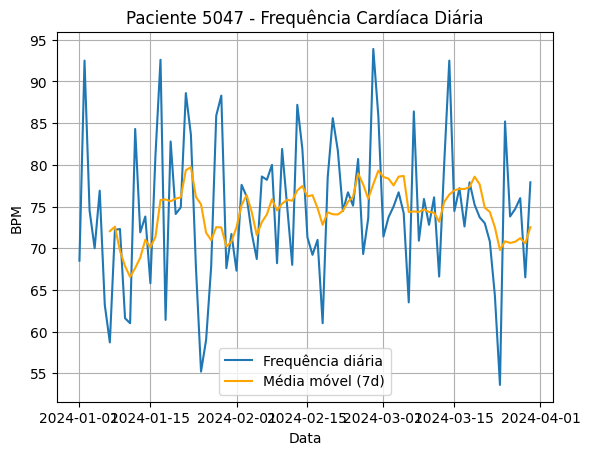

In [34]:
plt.plot(df_paciente["data"], df_paciente["frequencia_cardiaca"], label="Frequência diária")
plt.plot(df_paciente["data"], df_paciente["frequencia_cardiaca"].rolling(window=7).mean(), label="Média móvel (7d)", color="orange")
plt.title(f"Paciente {paciente_id} - Frequência Cardíaca Diária")
plt.xlabel("Data")
plt.ylabel("BPM")
plt.legend()
plt.grid(True)
plt.show()

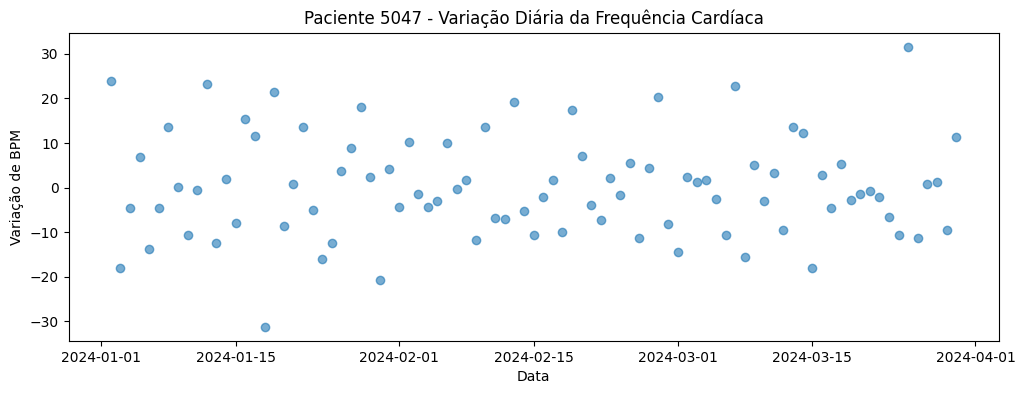

In [33]:
df_paciente["variacao"] = df_paciente["frequencia_cardiaca"].diff()

plt.figure(figsize=(12, 4))
plt.scatter(df_paciente["data"], df_paciente["variacao"], alpha=0.6)
plt.title(f"Paciente {paciente_id} - Variação Diária da Frequência Cardíaca")
plt.xlabel("Data")
plt.ylabel("Variação de BPM")
plt.show()

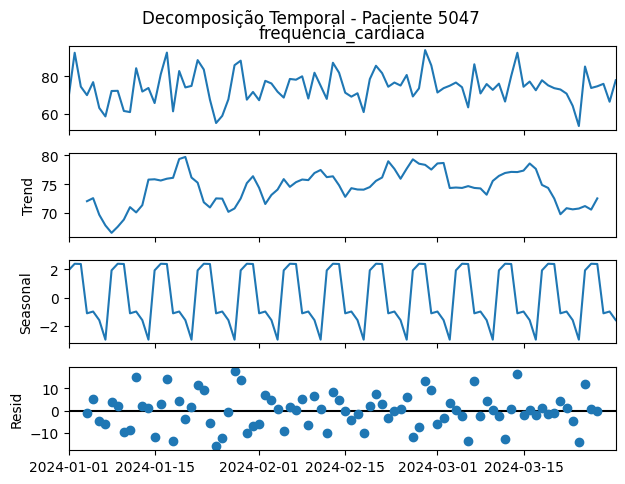

In [42]:
#utilize seasonal_decompose do statsmodels para decompor a série de um paciente:
serie = df_paciente.set_index("data")["frequencia_cardiaca"]

resultado = seasonal_decompose(serie, model="additive", period=7)
resultado.plot()
plt.suptitle(f"Decomposição Temporal - Paciente {paciente_id}", y=1)
plt.show()